In [1]:
import pandas as pd
import json 
import numpy

co2Arr = []
tempArr = []
dateTimeArr = []
nameArr = ['c2cha4','tcha4','hych4','10cha4','n2cha4','nocha4','dateheure']
dispArr = ['CO2','temp','humidity','PM10','NO2','NO','dateTime']
bigDataArr = []

with open('qualite-de-lair-mesuree-dans-la-station-chatelet.json') as json_data:
    jsonData = json.load(json_data)
    
    for i in jsonData:        
        
        fields = i['fields']        
        tempArr = []
        
        for j in range(len(nameArr)-1):            
            ent = numpy.nan
            if nameArr[j] in fields:
                ent = fields[nameArr[j]]
            tempArr.append(ent)
            
        j = len(nameArr)-1 # special processing for dateTime
        ent = numpy.nan
        if nameArr[j] in fields:
                ent = fields[nameArr[j]]
                ent = ent[0:19]
                ent = ent.replace("T"," ")
                #print(ent)
        tempArr.append(ent)
            
        bigDataArr.append(tempArr)
        
# transpose
bigDataArr = [[bigDataArr[j][i] for j in range(len(bigDataArr))] for i in range(len(bigDataArr[0]))] 
        
# c2cha4 = CO2
# tcha4 = TEMP
# hych4 = humidity
# 10cha4 = PM10
# n2cha4 = NO2
# nocha4 = NO
# dateheure = dateTime

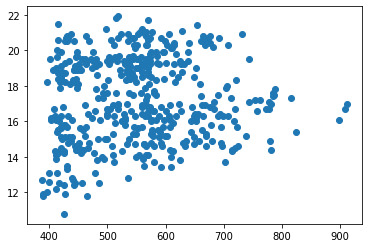

2019-09-08 19:00:00


In [3]:
# quick diagnostics
import matplotlib.pyplot as plt

#print(dateTimeArr[1:10])
fig = plt.scatter(bigDataArr[0][0:500],bigDataArr[1][0:500])
plt.show()
test = max(bigDataArr[6])
print(test)

In [5]:
# turn into dataframe for PROPHET
import pandas as pd
d = {'ds': bigDataArr[6],'y': bigDataArr[3]}
chateletPm10 = pd.DataFrame(data=d)

In [14]:
# start playing around with PROPHET
from fbprophet import Prophet

df = chateletPm10
df.head()

df = df.loc[0:200,:]

print(df)

m = Prophet()
m.fit(df) # Fitting should take 1-5 seconds

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                      ds     y
0    2018-12-31 18:00:00  54.0
1    2018-12-31 20:00:00  52.0
2    2019-01-01 08:00:00  41.0
3    2019-01-01 18:00:00  40.0
4    2019-01-01 20:00:00  20.0
..                   ...   ...
196  2019-02-11 07:00:00  85.0
197  2019-02-11 15:00:00  75.0
198  2019-02-11 16:00:00  62.0
199  2019-02-11 19:00:00  32.0
200  2019-02-11 21:00:00  41.0

[201 rows x 2 columns]


In [15]:
future = m.make_future_dataframe(periods=20)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
216,2019-02-27 21:00:00,83.719169,33.654567,134.867781
217,2019-02-28 21:00:00,100.906438,48.303974,149.111786
218,2019-03-01 21:00:00,83.735209,30.203543,134.029694
219,2019-03-02 21:00:00,66.917464,14.026413,116.027696
220,2019-03-03 21:00:00,80.839539,32.192011,132.411774


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


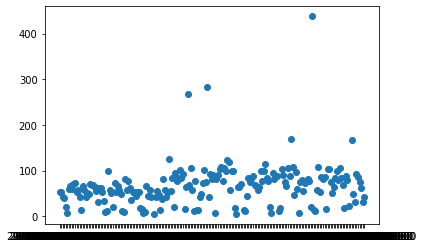

In [45]:
plt.scatter(df.ds,df.y)

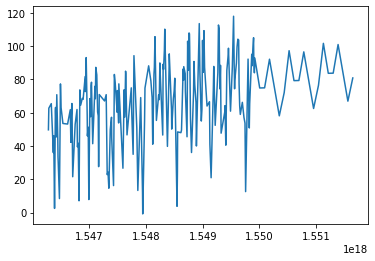

In [46]:
plt.plot(forecast.ds,forecast.yhat)